# SHIKHAR SAXENA

# SPARKS FOUNDATION INTERNSHIP TASK 6

# DATA SCIENCE AND BUSINESS ANALYSIS INTERN

# TASK 6: Prediction using Decision Tree Algorithm 

# Create the Decision Tree classifier and visualize it graphically on given Iris dataset. 

# The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

In [8]:
#Importing the required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image 
from pydot import graph_from_dot_data

In [9]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
data = sns.load_dataset('iris')

In [142]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
#checking the missing values

data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
data.shape

(150, 5)

In [24]:
data.groupby(['species']).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


# Data Visualization

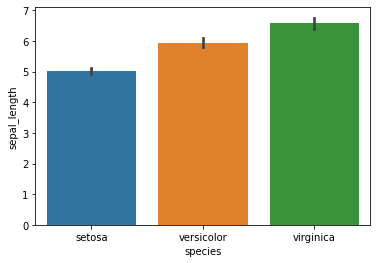

In [25]:
#Analysing sepal length of diffferent species

sns.barplot(x='species',y='sepal_length', data=data)
plt.show()

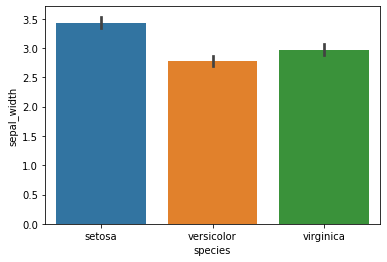

In [27]:
#Analysing sepal width of diffferent species

sns.barplot(x='species',y='sepal_width', data=data)
plt.show()

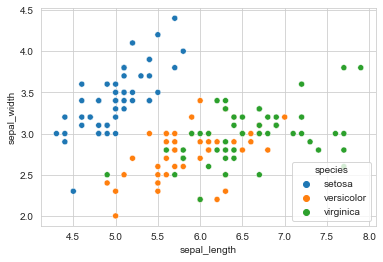

In [31]:
#scatterplot between sepal length and sepal width

#hue is used to differentiate between different species

sns.scatterplot(x=data['sepal_length'],y=data["sepal_width"],hue=data["species"],cmap='rainbow')
sns.set_style("whitegrid");
plt.show()

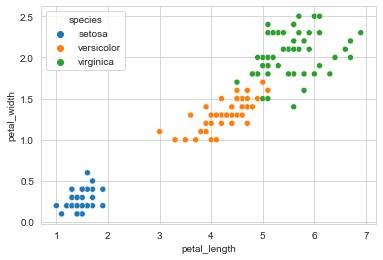

In [32]:
#scatterplot between petal length and petal width

#hue is used to differentiate between different species

sns.scatterplot(x=data['petal_length'],y=data["petal_width"],hue=data["species"],cmap='rainbow')
sns.set_style("whitegrid");
plt.show()

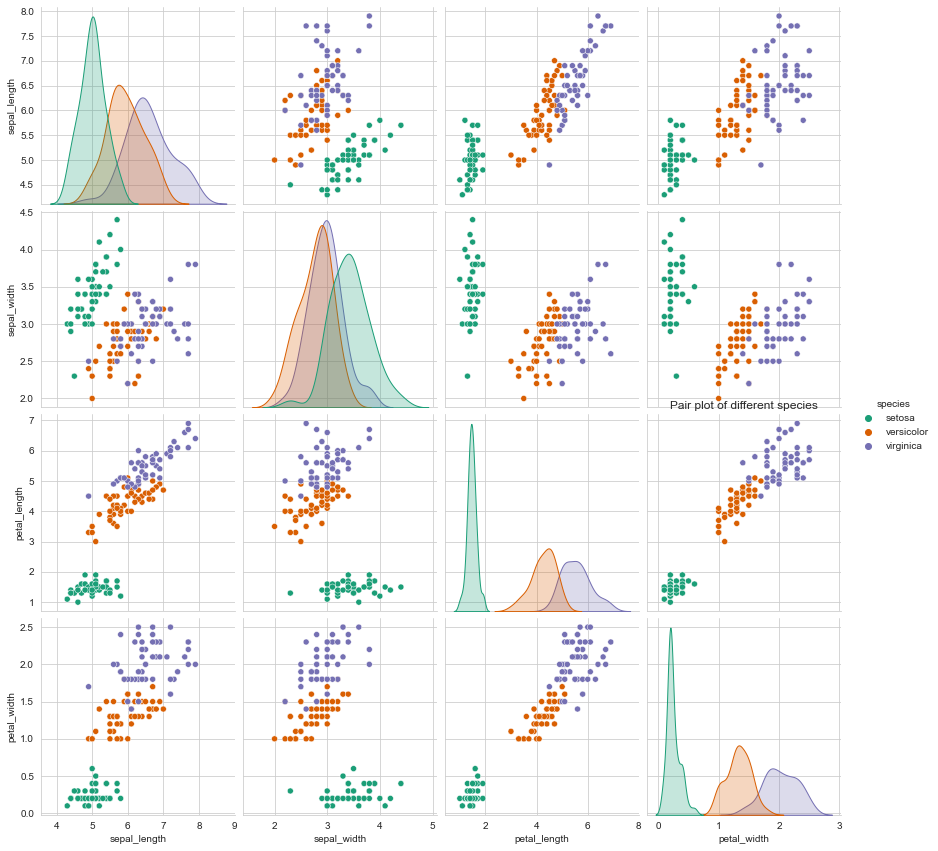

In [43]:
#pairplot between different species

sns.pairplot(data,hue='species',palette='Dark2', size=3)
sns.set_style("whitegrid");
plt.show()

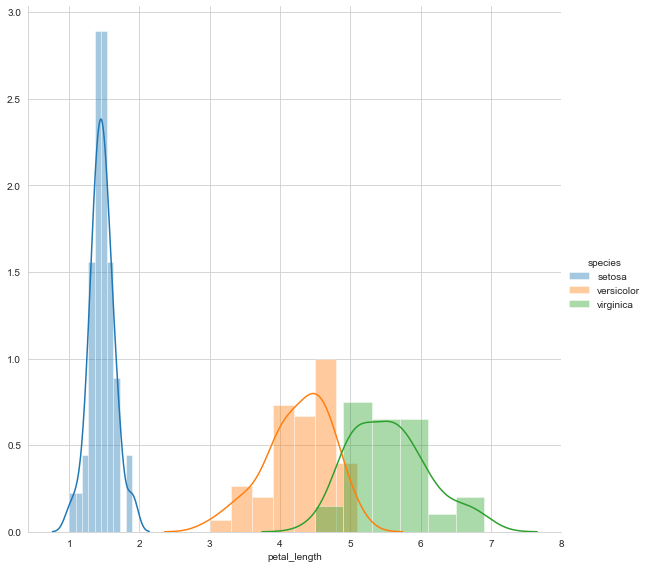

In [50]:
#Distribution of petal length

sns.FacetGrid(data, hue="species", size=8) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

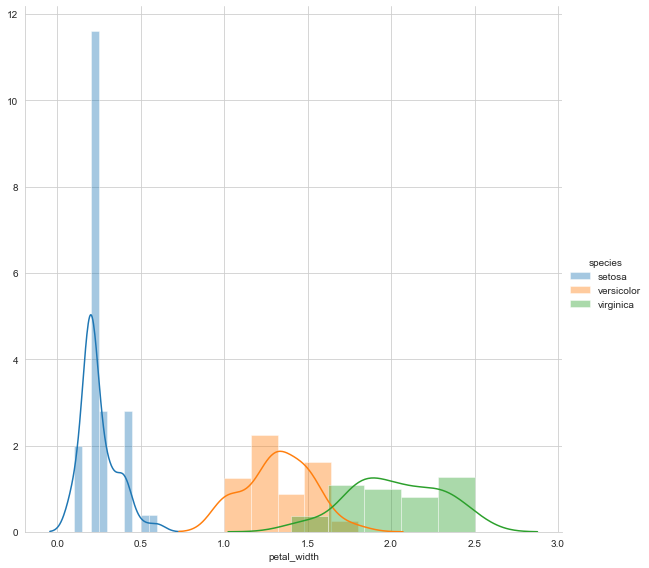

In [51]:
#Distribution of petal Width

sns.FacetGrid(data, hue="species", size=8) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

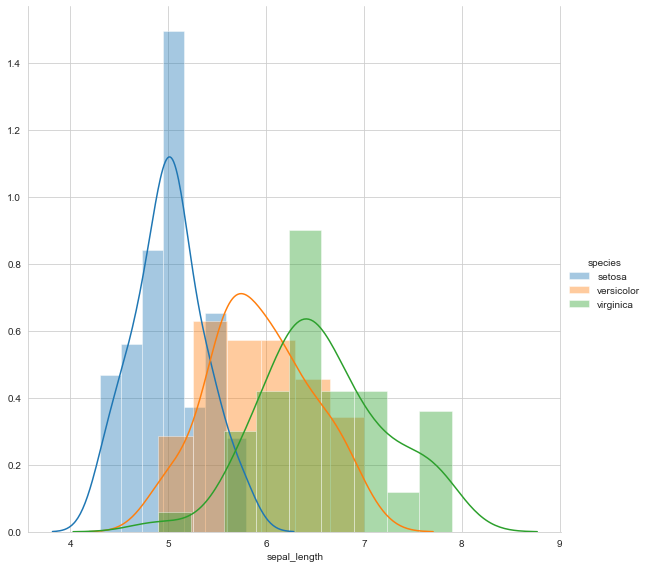

In [52]:
#Distribution of sepal length

sns.FacetGrid(data, hue="species", size=8) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

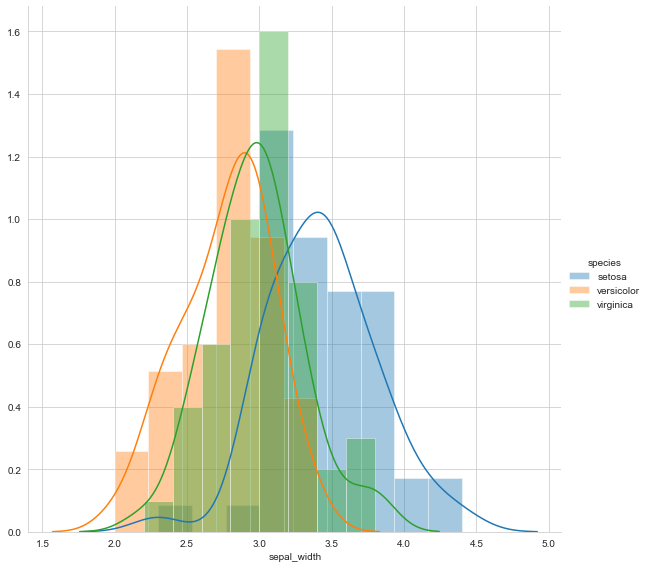

In [53]:
#Distribution of sepal width

sns.FacetGrid(data, hue="species", size=8) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

# Data Preprocessing

In [124]:
target = data['species']
data1 = data.copy()
data1 = data1.drop('species', axis = 1)

In [125]:
data1.shape

(150, 4)

In [126]:
# Defining the attributes and labels

#attributes
X = data.iloc[:, [0, 1, 2, 3]].values

le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

#labels
y = data['species'].values
print("The shape of the data is: ", data.shape)

The shape of the data is:  (150, 5)


# Decision Tree Algorithm

In [161]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [162]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)
print(f"Train labels:\n{Y_train}")
print(f"Test labels:\n{Y_test}")

Train labels:
61     1
92     1
112    2
2      0
141    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: target, Length: 112, dtype: int32
Test labels:
114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
137    2
84     1
27     0
127    2
132    2
59     1
18     0
83     1
Name: target, dtype: int32


In [192]:
# Predicting the values of test data

y_pred = dtree.predict(X_test)
print("Classification report:",classification_report(Y_test,y_pred))

Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [193]:
#Acccuracy of the model

print("Accuracy of the model: ",sm.accuracy_score(Y_test, y_pred))

Accuracy of the model:  0.9736842105263158


In [194]:
#Confusion matrix

cm = confusion_matrix(Y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [195]:
from sklearn.tree import DecisionTreeClassifier

# Training the model

In [196]:
clf = DecisionTreeClassifier(max_depth = 6,
                             random_state = 0)

#Train the model
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

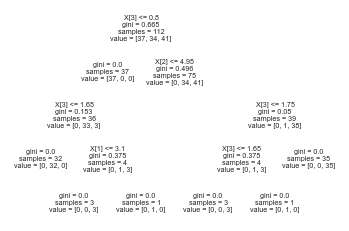

In [197]:
tree.plot_tree(dtc);

# Visualizing the trained model

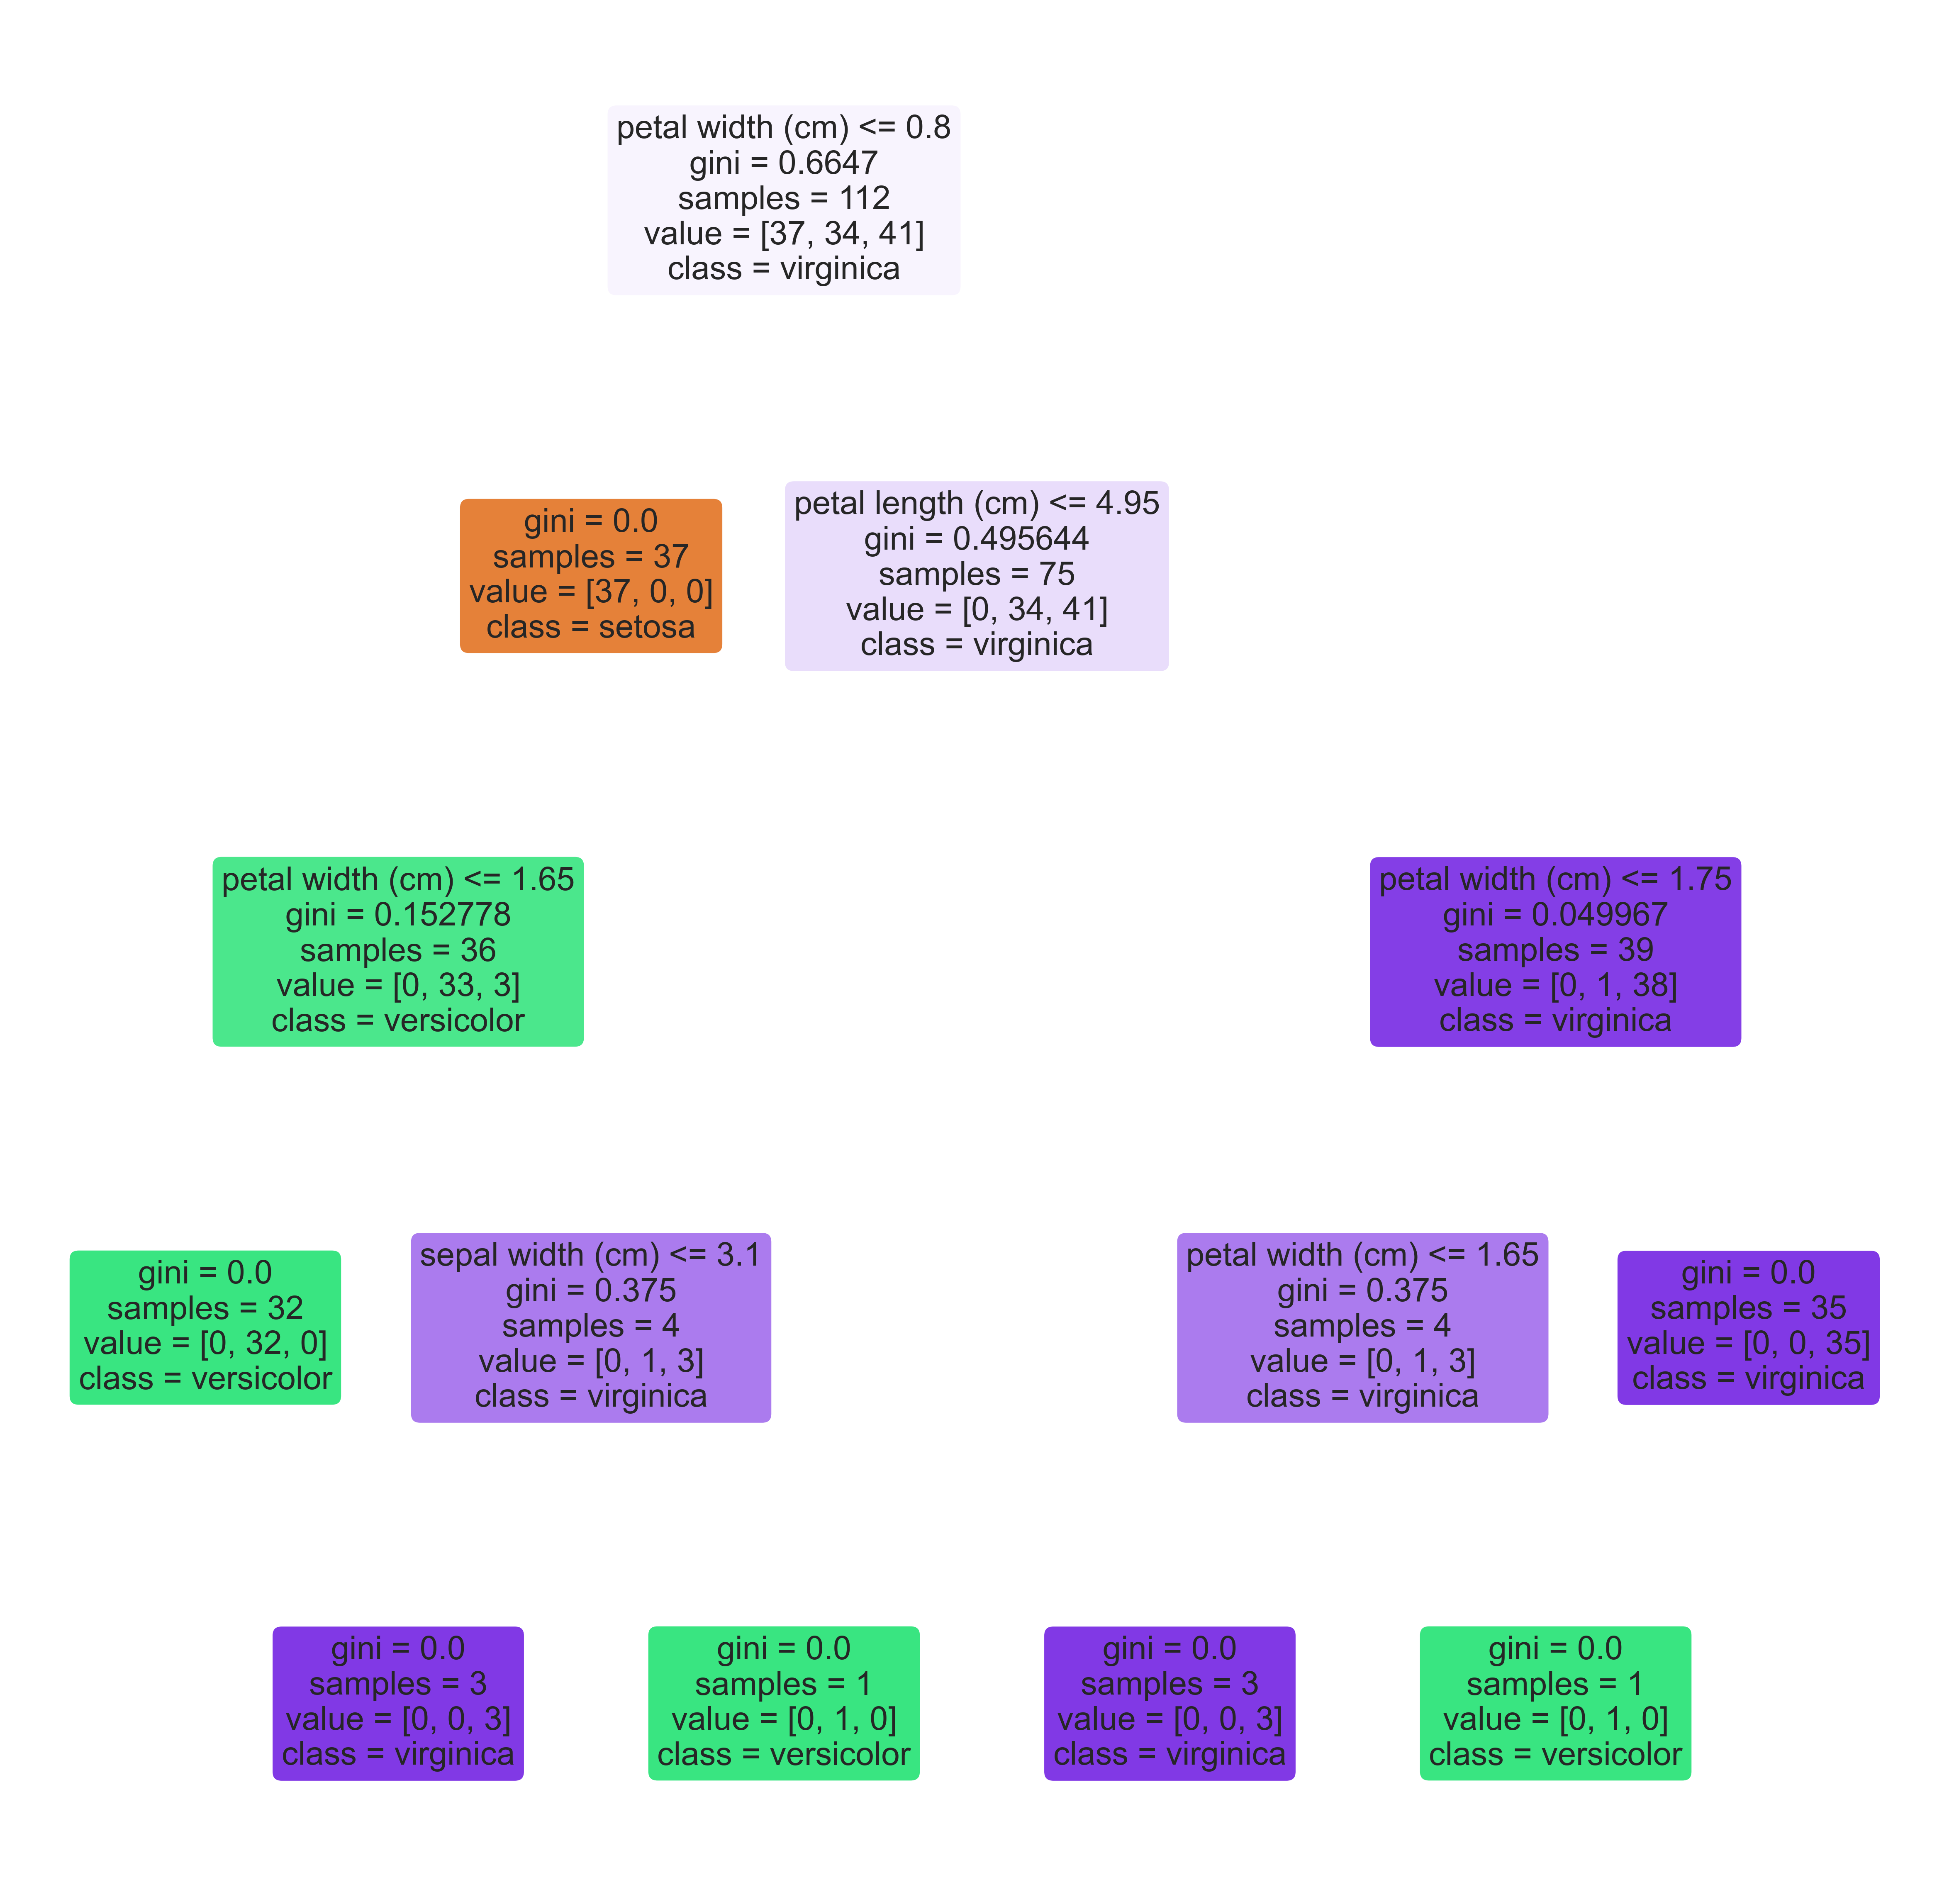

In [198]:
#visualizing the decision tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20),dpi=300)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True,precision = 6, rounded=True);
fig.savefig('imagename.png');

# Conclusion

I have successfully created the Decision Tree classifier and visualized it graphically. 